Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
from skimage.color import rgb2hsv, hsv2rgb

In [42]:
# загрузим картинку
img = plt.imread('DSC03491.JPG')

In [43]:
# Размеры
img.shape

(3264, 4912, 3)

In [44]:
# посмотрими на нее

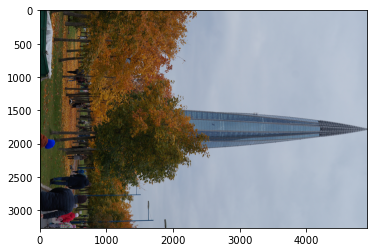

In [45]:
plt.imshow(img)

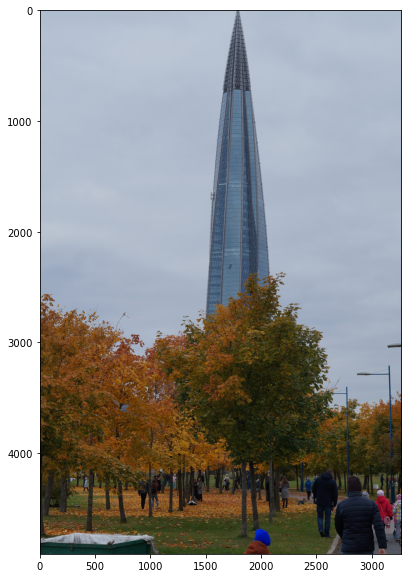

In [46]:
# Перевенем картинку
img = np.transpose(img,axes=[1,0,2])
img = img[::-1,:,:]
plt.figure(figsize=(10,10))
plt.imshow(img)

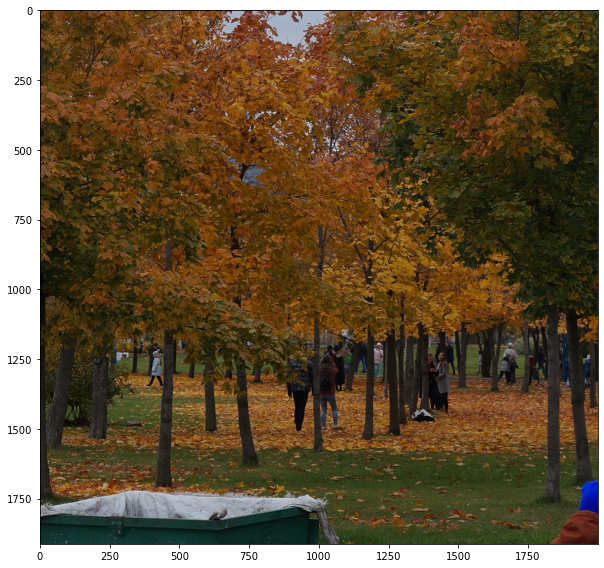

In [51]:
plt.figure(figsize=(10,10))
plt.imshow(img[3000:,:2000])

In [53]:
new_img = np.copy(img[3000:,:2000])

In [54]:
# переведем другое цветовое пространство или фильтрация. 
img_hsv = rgb2hsv(new_img)

In [65]:
img_hsv.shape

(1912, 2000, 3)

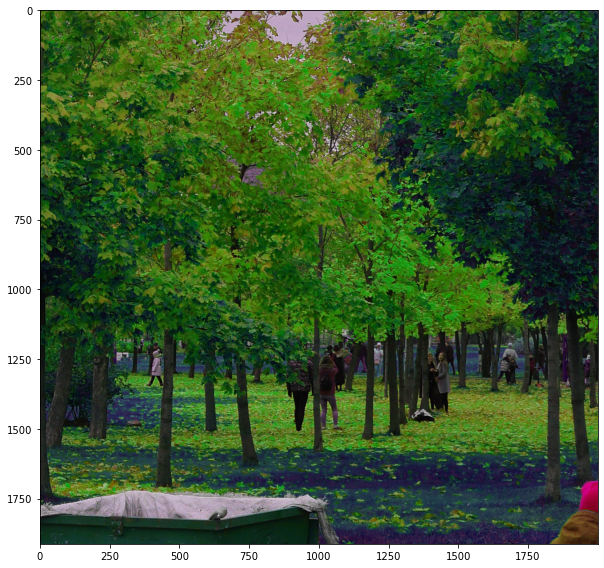

In [77]:
# Хотим лето получить :)
img_hsv_1 = np.copy(img_hsv)
plt.figure(figsize=(10,10))
img_hsv_1[:,:,0] = img_hsv[:,:,0] *3
plt.imshow(hsv2rgb(img_hsv_1))

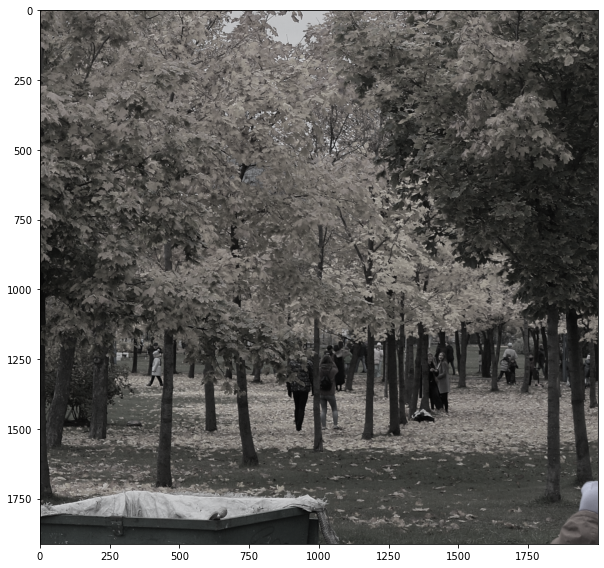

In [83]:
# серую осень
img_hsv_2 = np.copy(img_hsv)
plt.figure(figsize=(10,10))
img_hsv_2[:,:,1] = img_hsv[:,:,1] *0.1
plt.imshow(hsv2rgb(img_hsv_2))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


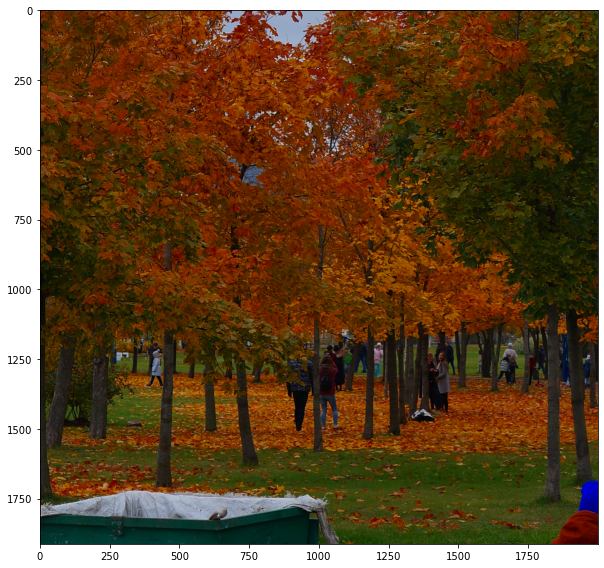

In [86]:
# сочную осень осень
img_hsv_2 = np.copy(img_hsv)
plt.figure(figsize=(10,10))
img_hsv_2[:,:,1] = img_hsv[:,:,1] *1.5
plt.imshow(hsv2rgb(img_hsv_2))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


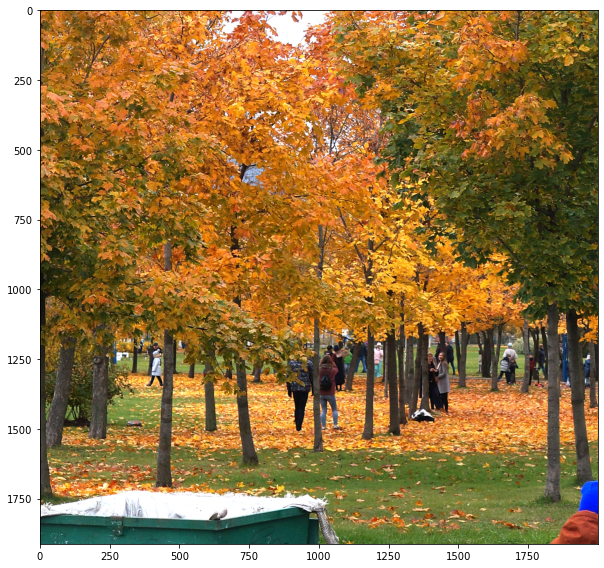

In [90]:
# Добавим света
img_hsv_3 = np.copy(img_hsv)
plt.figure(figsize=(10,10))
img_hsv_3[:,:,2] = img_hsv[:,:,2] *1.8
plt.imshow(hsv2rgb(img_hsv_3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


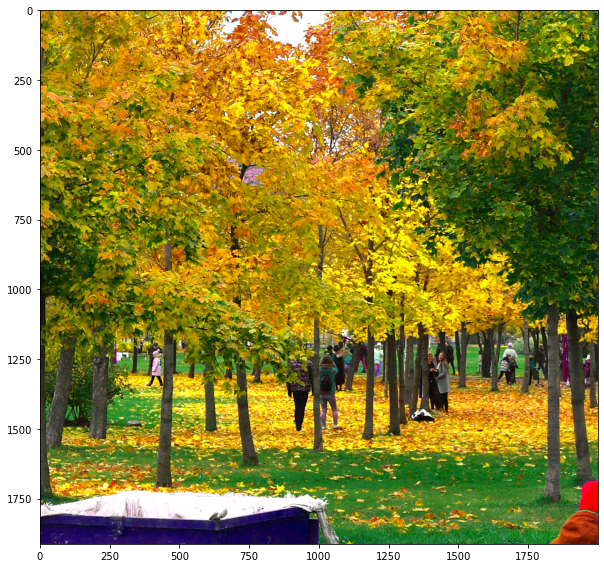

In [98]:
img_hsv_finish = np.copy(img_hsv)
plt.figure(figsize=(10,10))
img_hsv_finish[:,:,2] = img_hsv[:,:,2] *1.8
img_hsv_finish[:,:,1] = img_hsv[:,:,1] *1.3
img_hsv_finish[:,:,0] = img_hsv[:,:,0] *1.5

plt.imshow(hsv2rgb(img_hsv_finish))

In [99]:
def my_filter(x):
    return np.median(x)

In [117]:
%%time
win_size = (20, 20) # размер окна
im = hsv2rgb(img_hsv_3)
out_img = np.zeros(
    (im.shape[0] - win_size[0] + 1,
     im.shape[1] - win_size[1] + 1,3))

for z in range (3):
    for i in range(out_img.shape[0]):
        for j in range(out_img.shape[1]):
            x = im[i:i+win_size[0], j:j+win_size[1],z]
            out_img[i,j,z] = my_filter(x)

Wall time: 5min 30s


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


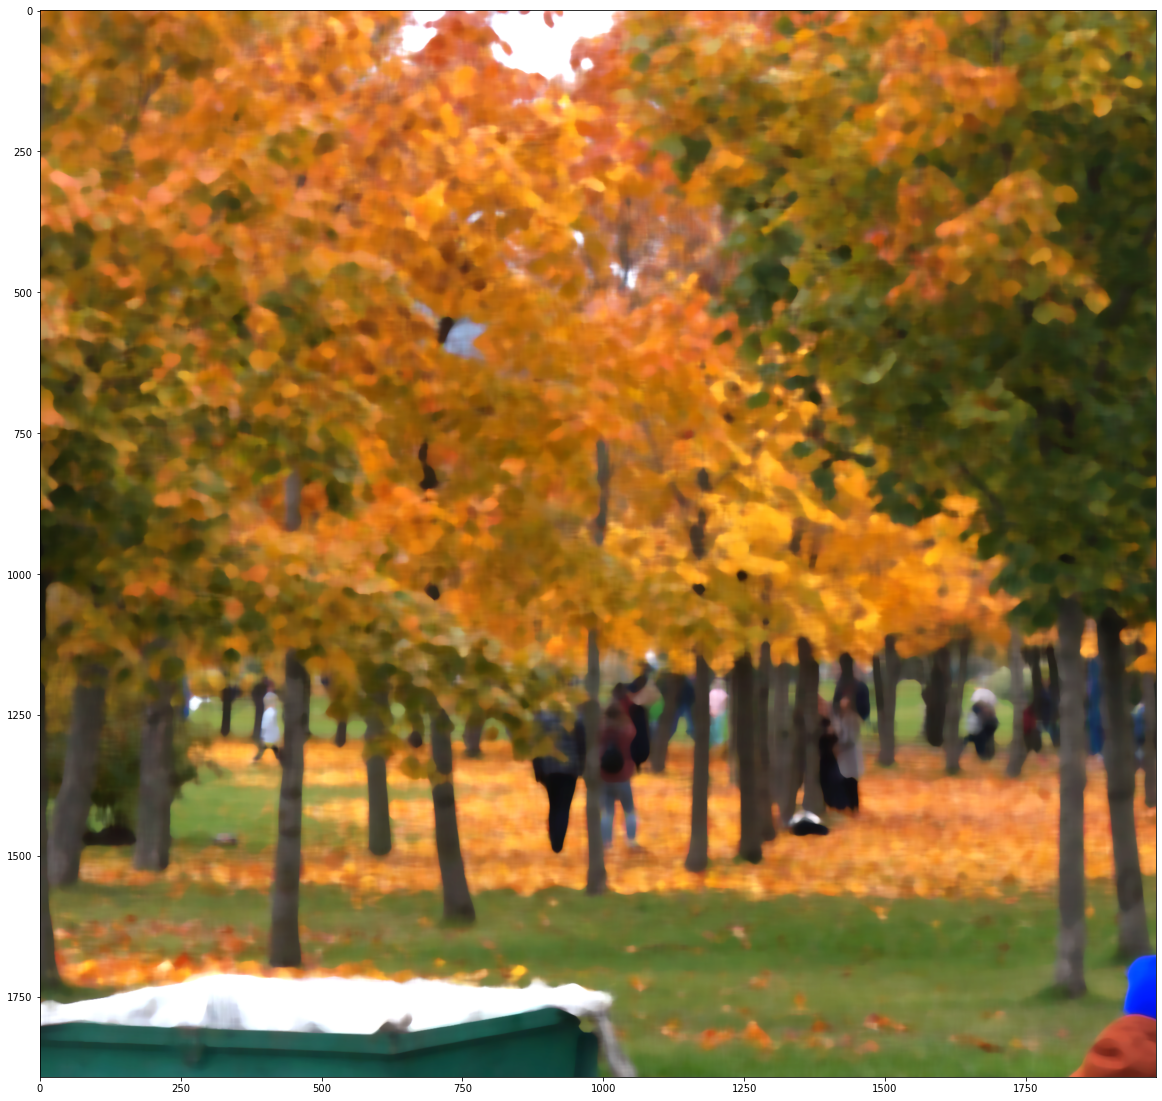

In [118]:
plt.figure(figsize=(20,20))
plt.imshow(out_img)